In [119]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [292]:
#Separating the 3 tables into dataframes
spend = pd.read_csv('../data/spend.csv', delimiter='\t', index_col=0)
for x in spend:
    spend[x] = ([i[1:] for i in spend[x]])
    spend[x] = spend[x].str.replace(',', '')
    
spend = spend.apply(pd.to_numeric)

opp = pd.read_csv('../data/opportunities.csv', delimiter='\t', index_col=0)


sales = pd.read_csv('../data/sales.csv', delimiter='\t', index_col=0)


#Creating transposed dataframes as well
spend_transposed = spend.T    
spend_transposed = spend_transposed.apply(pd.to_numeric)
spend_transposed['monthly_total (Millions)'] = spend_transposed.sum(axis=1)
spend_transposed['monthly_total (Millions)'] = [(x/1000000) for x in spend_transposed['monthly_total (Millions)']]

opp_transposed = opp.T
opp_transposed['monthly_total'] = opp_transposed.sum(axis=1)
opp_total = opp_transposed.T.sum(axis=1)

sales_transposed = sales.T
sales_transposed['monthly_total'] = sales_transposed.sum(axis=1)


In [294]:
#prev_spend (2020 Budget) | new_spend (2021 Budget)
prev_spend = 25709028
new_spend = 32000000

# 

# 

# 

# 

# Google Display Marketing/Ads

In [123]:
google = pd.DataFrame(spend_transposed['Google Display'])
google.rename(columns={'Google Display': 'spend'}, inplace=True)
google['opportunity'] = opp_transposed['Google Display']
google['sales'] = sales_transposed['Google Display']
google

,spend,opportunity,sales
Jan-20,263800,4868,1217
Feb-20,492366,4056,1014
Mar-20,424786,2894,752
Apr-20,277572,2543,737
May-20,309968,4041,1212
Jun-20,391885,4730,1277
Jul-20,497580,3095,867
Aug-20,327891,3538,885
Sep-20,309896,2630,658
Oct-20,636247,7023,2107


In [124]:
google_stats = pd.DataFrame()
for x in google:
    google_stats[x] = google[x].describe()
    
google_stats

,spend,opportunity,sales
count,12.0000,12.0000,12.0000
mean,478921.5833,4227.3333,1160.9167
std,228463.2795,1423.1042,437.3009
min,263800.0000,2543.0000,658.0000
25%,309950.0000,3044.7500,838.2500
50%,408335.5000,4048.5000,1113.0000
75%,532246.7500,4913.2500,1336.5000
max,953374.0000,7023.0000,2107.0000


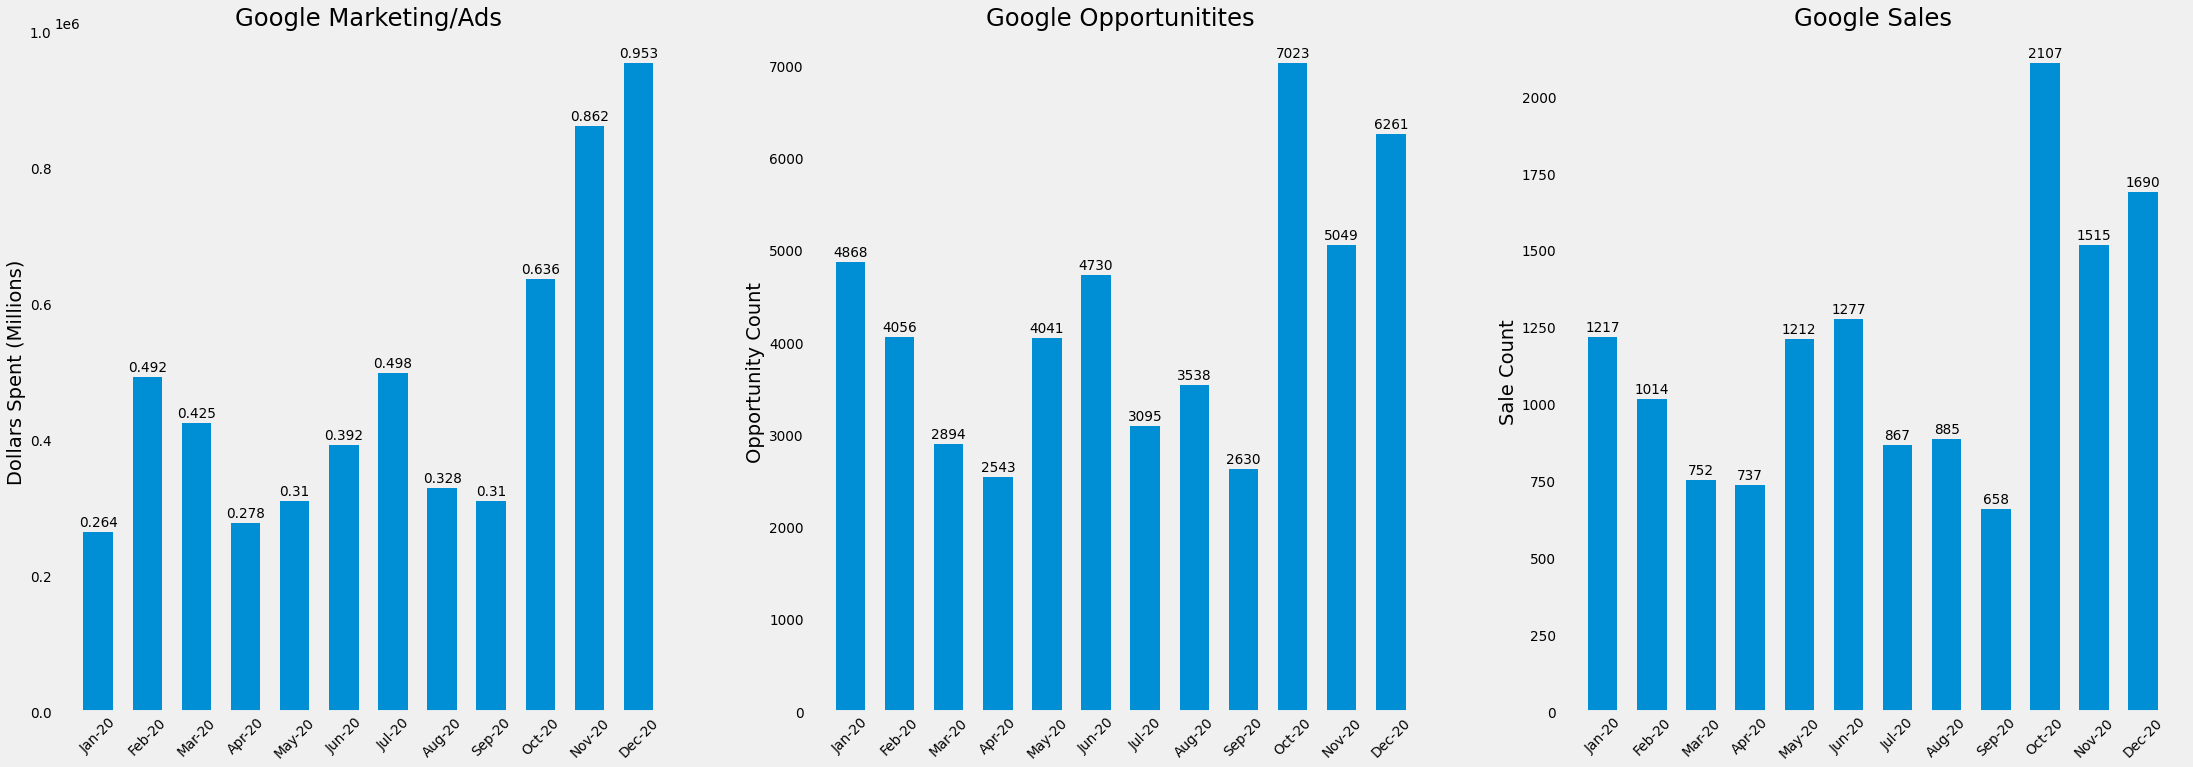

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(google.index, google['spend'], 0.6)
ax[0].set_ylabel('Dollars Spent (Millions)', fontsize=20)
ax[0].set_title('Google Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(google.index, rotation=45)
ax[0].grid(False)


rect2 = ax[1].bar(google.index, google['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('Google Opportunitites', fontsize=25)
ax[1].set_xticklabels(google.index, rotation=45)
ax[1].grid(False)


rect3 = ax[2].bar(google.index, google['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('Google Sales', fontsize=25)
ax[2].set_xticklabels(google.index, rotation=45)
ax[2].grid(False)




def autolabel(rects, axes, million=False):
    for rect in rects:
        if million:
            height = rect.get_height()
            ax[axes].annotate('{}'.format((height / 1000000).round(3)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            height = rect.get_height()
            ax[axes].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
            

autolabel(rect1, 0, million=True)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating google_cac dictionary containing months as keys and the Customer Acquisition Cost for Google as values

In [126]:
google_cac = {}
for m, x in enumerate(zip(list(google.spend), list(google.sales))):
    google_cac.update({m+1: np.round((x[0]/x[1]), 2)})

### Creating google_opp_sale_conversion dictionary containing months as keys and the percentage of opportunites resulting in sales for Google as values

In [127]:
google_opp_sale_conversion = {}
for m, x in enumerate(zip(list(google.opportunity), list(google.sales))):
    google_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

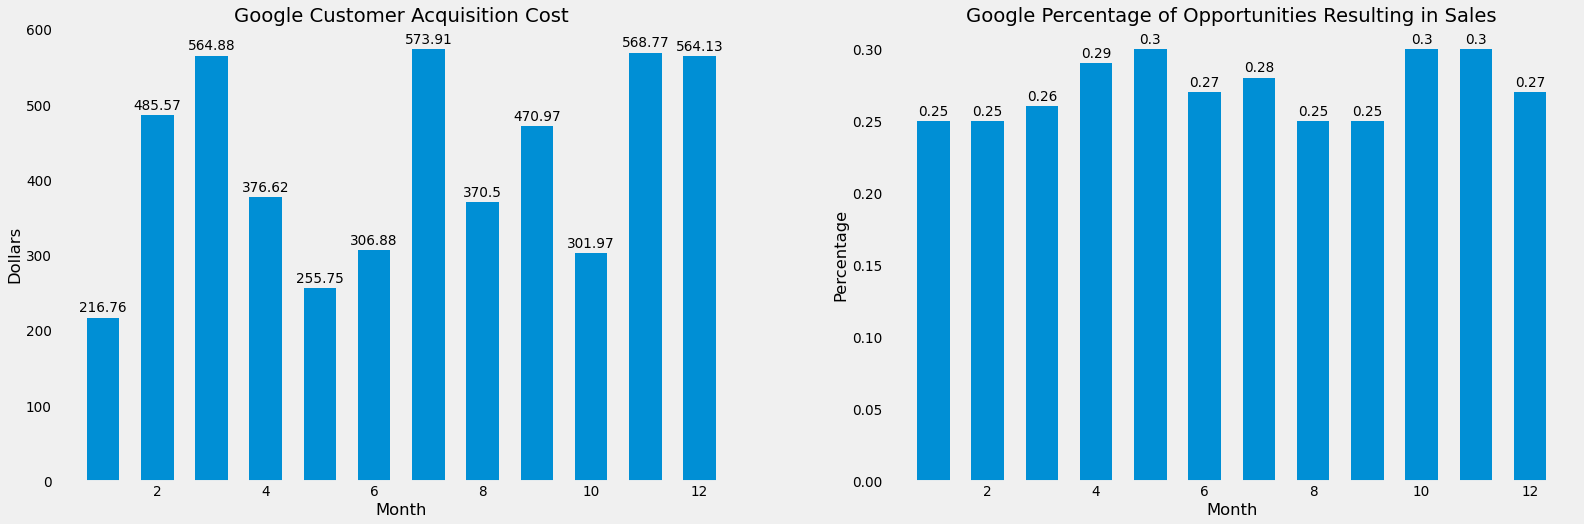

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(google_cac.keys(), google_cac.values(), width=0.6)

ax[0].set_title('Google Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(google_opp_sale_conversion.keys(), google_opp_sale_conversion.values(), width=0.6)
ax[1].set_title('Google Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

In [129]:
#count of opportunities not resulting in sales
google['no_sale'] = [(x-i) for x, i in list(zip(google.opportunity, google.sales))]

#percentage of annual budget
google['Spend_%'] = [x/prev_spend for x in google.spend]

#percentage of channel's annual budget
google['Spend_%_google_budget'] = [(x/google.spend.sum()) for x in google.spend]

#percentage of all opportunities
google['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(google.opportunity, opp_transposed.monthly_total))]  

#percentage of annual sales acquired by marketing channel
google['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(google.sales, sales_transposed.monthly_total))] 

#Customer Acquisition Cost
google['CAC'] = google_cac.values()

#Sales/Opportunities Conversion
google['%_Opp->Sale'] = google_opp_sale_conversion.values()

#2021 Budget
google['new_spend'] = [(x*new_spend) for x in google['Spend_%']]
google

,spend,opportunity,sales,no_sale,Spend_%,Spend_%_google_budget,Opp_%,Sale_%,CAC,%_Opp->Sale,new_spend
Jan-20,263800,4868,1217,3651,0.0103,0.0459,0.2630,0.2010,216.7600,0.2500,328351.5814
Feb-20,492366,4056,1014,3042,0.0192,0.0857,0.2580,0.2210,485.5700,0.2500,612847.4402
Mar-20,424786,2894,752,2142,0.0165,0.0739,0.2080,0.1880,564.8800,0.2600,528730.6856
Apr-20,277572,2543,737,1806,0.0108,0.0483,0.1580,0.1530,376.6200,0.2900,345493.5753
May-20,309968,4041,1212,2829,0.0121,0.0539,0.2850,0.2870,255.7500,0.3000,385816.8422
Jun-20,391885,4730,1277,3453,0.0152,0.0682,0.2560,0.2060,306.8800,0.2700,487778.8456
Jul-20,497580,3095,867,2228,0.0194,0.0866,0.2330,0.2050,573.9100,0.2800,619337.3005
Aug-20,327891,3538,885,2653,0.0128,0.0571,0.2490,0.2080,370.5000,0.2500,408125.5814
Sep-20,309896,2630,658,1972,0.0121,0.0539,0.1610,0.1280,470.9700,0.2500,385727.2239
Oct-20,636247,7023,2107,4916,0.0247,0.1107,0.2420,0.2190,301.9700,0.3000,791935.9690


# 

# 

# 

# 

# FaceBook Marketing/Ads

In [130]:
facebook = pd.DataFrame(spend_transposed['Facebook'])
facebook.rename(columns={'Facebook': 'spend'}, inplace=True)
facebook['opportunity'] = opp_transposed['Facebook']
facebook['sales'] = sales_transposed['Facebook']
facebook

,spend,opportunity,sales
Jan-20,294315,2815,760
Feb-20,312374,4709,1319
Mar-20,391183,4400,1144
Apr-20,434960,4424,1194
May-20,438772,2658,797
Jun-20,288387,2707,731
Jul-20,413709,4181,1254
Aug-20,332810,2558,691
Sep-20,282658,2960,888
Oct-20,729171,6563,1903


In [131]:
facebook_stats = pd.DataFrame()
for x in facebook:
    facebook_stats[x] = facebook[x].describe()
    
facebook_stats

,spend,opportunity,sales
count,12.0000,12.0000,12.0000
mean,463800.3333,4296.2500,1209.1667
std,211585.6468,1676.7052,493.6018
min,282658.0000,2558.0000,691.0000
25%,307859.2500,2788.0000,787.7500
50%,402446.0000,4290.5000,1169.0000
75%,509104.7500,5059.0000,1386.2500
max,927162.0000,7471.0000,2241.0000


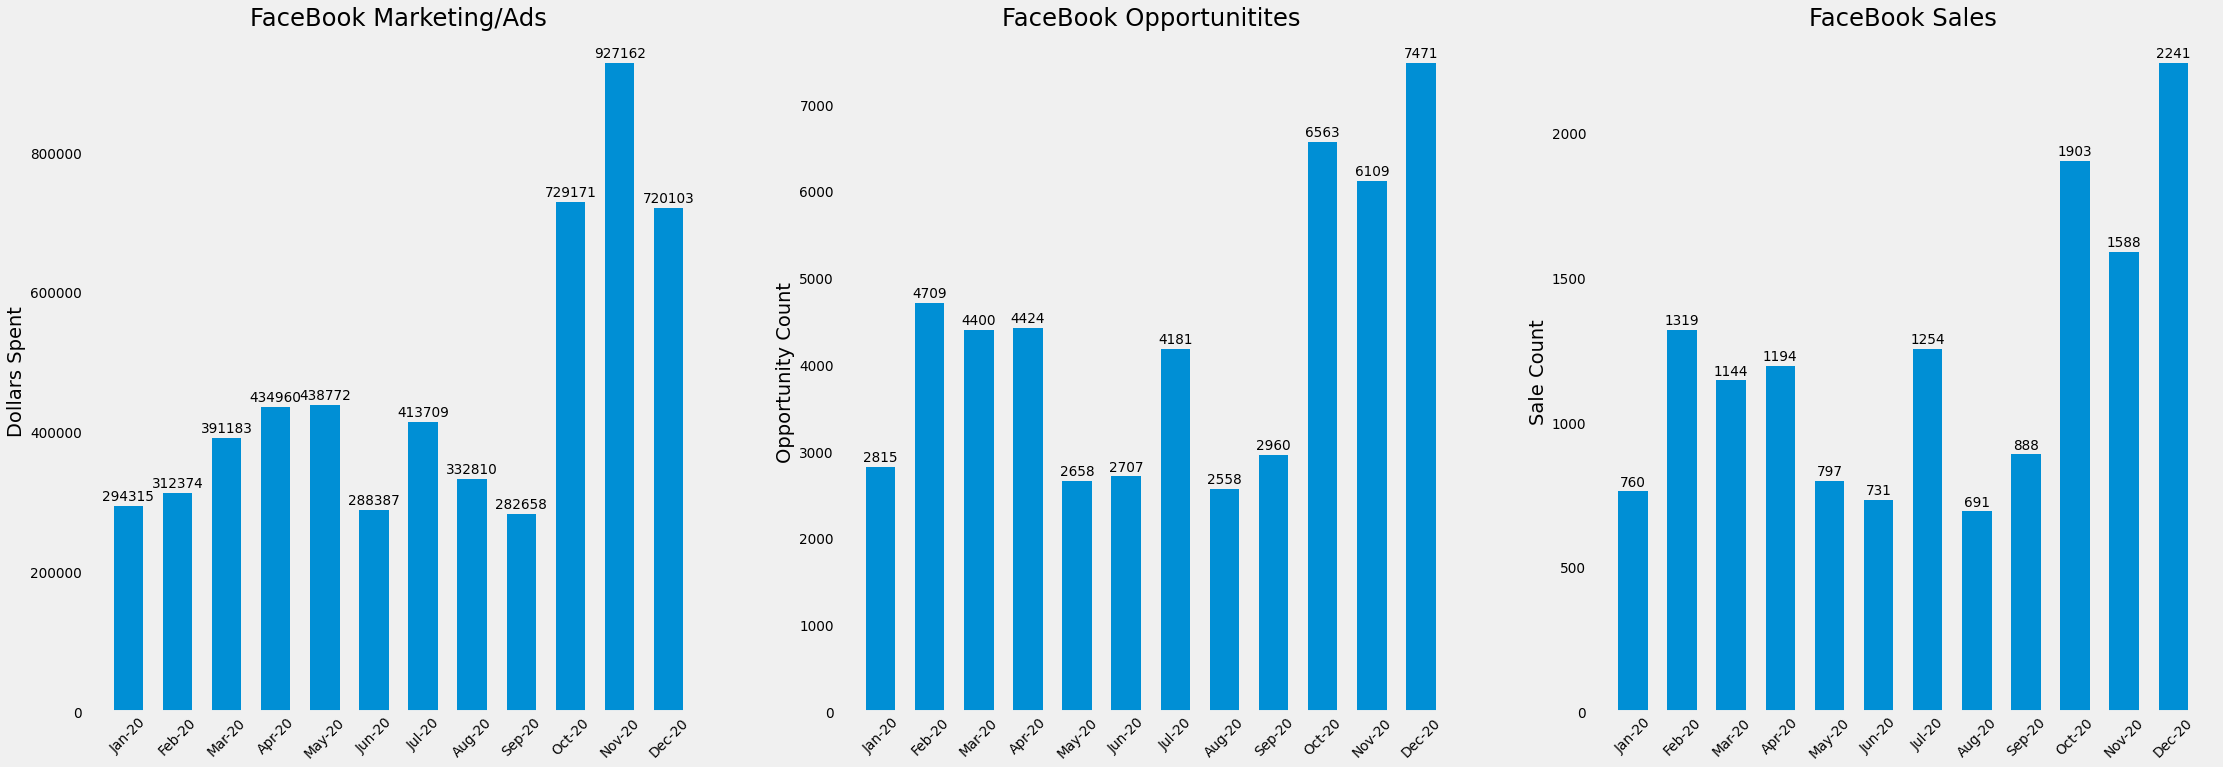

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(facebook.index, facebook.spend, 0.6)
ax[0].set_ylabel('Dollars Spent', fontsize=20)
ax[0].set_title('FaceBook Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(facebook.index, rotation=45)

rect2 = ax[1].bar(facebook.index, facebook['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('FaceBook Opportunitites', fontsize=25)
ax[1].set_xticklabels(facebook.index, rotation=45)


rect3 = ax[2].bar(facebook.index, facebook['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('FaceBook Sales', fontsize=25)
ax[2].set_xticklabels(facebook.index, rotation=45)

ax[0].grid(False)

ax[1].grid(False)

ax[2].grid(False)



autolabel(rect1, 0)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating facebook_cac dictionary containing months as keys and the Customer Acquisition Cost for FaceBook as values

In [133]:
facebook_cac = {}
for m, x in enumerate(zip(list(facebook.spend), list(facebook.sales))):
    facebook_cac.update({m+1: np.round((x[0]/x[1]), 2)})

### Creating fb_opp_sale_conversion dictionary containing months as keys and the percentage of opportunities resulting in sales for FaceBook as values

In [134]:
fb_opp_sale_conversion = {}
for m, x in enumerate(zip(list(facebook.opportunity), list(facebook.sales))):
    fb_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

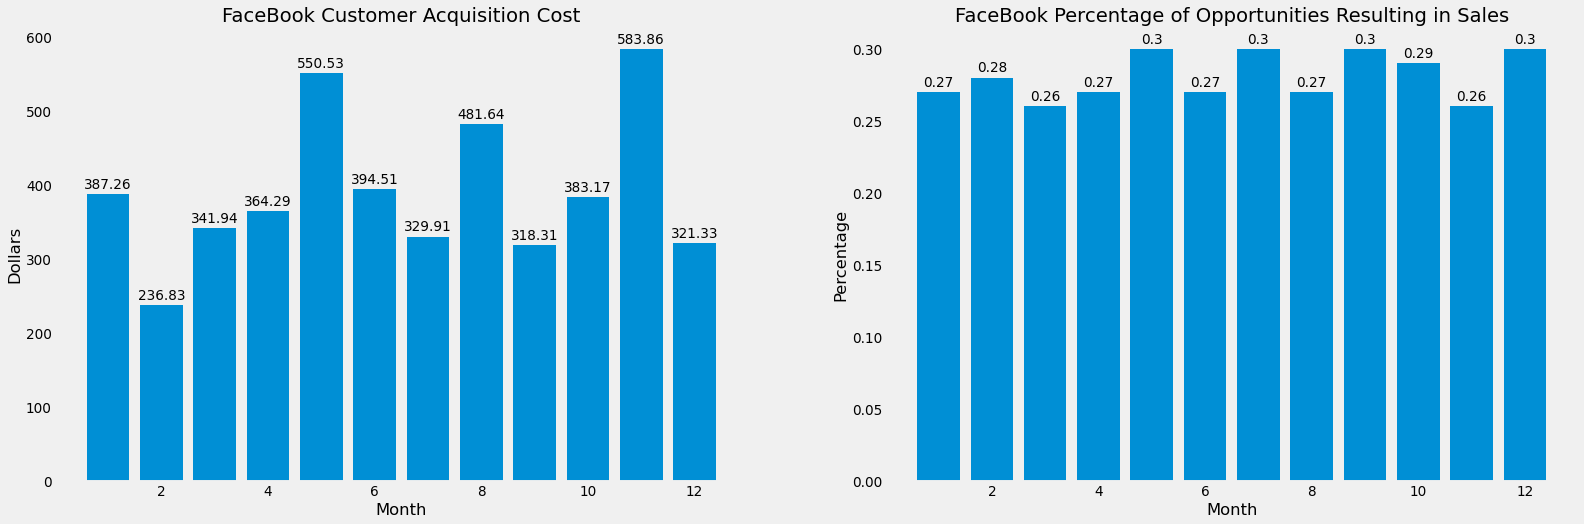

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(facebook_cac.keys(), facebook_cac.values())

ax[0].set_title('FaceBook Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(fb_opp_sale_conversion.keys(), fb_opp_sale_conversion.values())
ax[1].set_title('FaceBook Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

In [295]:
#count of opportunities not resulting in sales
facebook['no_sale'] = [(x-i) for x, i in list(zip(facebook.opportunity, facebook.sales))]

#percentage of annual budget
facebook['Spend_%'] = [x/prev_spend for x in facebook.spend]

#percentage of channel's annual budget
facebook['Spend_%_facebook_budget'] = [(x/facebook.spend.sum()) for x in facebook.spend]

#percentage of all opportunities
facebook['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(facebook.opportunity, opp_transposed.monthly_total))]    

#percentage of annual sales acquired by marketing channel
facebook['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(facebook.sales, sales_transposed.monthly_total))] 

#Customer Acquisition Cost
facebook['CAC'] = facebook_cac.values()

#Sales/Opportunities Conversion
facebook['%_Opp->Sale'] = fb_opp_sale_conversion.values()

#2021 Budget
facebook['new_spend'] = [(x*new_spend) for x in facebook['Spend_%']]

facebook

,spend,opportunity,sales,no_sale,Spend_%,Spend_%_facebook_budget,Opp_%,Sale_%,CAC,%_Opp->Sale,new_spend
Jan-20,294315,2815,760,2055,0.0114,0.0529,0.1520,0.1260,387.2600,0.2700,366333.5697
Feb-20,312374,4709,1319,3390,0.0122,0.0561,0.3000,0.2870,236.8300,0.2800,388811.5879
Mar-20,391183,4400,1144,3256,0.0152,0.0703,0.3160,0.2870,341.9400,0.2600,486905.0670
Apr-20,434960,4424,1194,3230,0.0169,0.0782,0.2740,0.2480,364.2900,0.2700,541394.2526
May-20,438772,2658,797,1861,0.0171,0.0788,0.1870,0.1880,550.5300,0.3000,546139.0450
Jun-20,288387,2707,731,1976,0.0112,0.0518,0.1460,0.1180,394.5100,0.2700,358954.9943
Jul-20,413709,4181,1254,2927,0.0161,0.0743,0.3150,0.2970,329.9100,0.3000,514943.1554
Aug-20,332810,2558,691,1867,0.0129,0.0598,0.1800,0.1630,481.6400,0.2700,414248.2555
Sep-20,282658,2960,888,2072,0.0110,0.0508,0.1810,0.1730,318.3100,0.3000,351824.1141
Oct-20,729171,6563,1903,4660,0.0284,0.1310,0.2260,0.1980,383.1700,0.2900,907598.3736


# 

# 

# 

# 

# TV Marketing/Ads

In [137]:
tv = pd.DataFrame(spend_transposed['TV'])
tv.rename(columns={'TV': 'spend'}, inplace=True)
tv['opportunity'] = opp_transposed['TV']
tv['sales'] = sales_transposed['TV']
tv

,spend,opportunity,sales
Jan-20,898785,9347,3739
Feb-20,851612,5412,1948
Mar-20,999230,5881,1941
Apr-20,835727,7843,2667
May-20,785051,6027,1868
Jun-20,796760,9745,3898
Jul-20,528539,5176,1915
Aug-20,941742,6646,2459
Sep-20,727769,9615,3365
Oct-20,1490451,12845,5138


In [138]:
tv_stats  = pd.DataFrame()
for x in tv:
    tv_stats[x] =  tv[x].describe()
    
tv_stats

,spend,opportunity,sales
count,12.0000,12.0000,12.0000
mean,1053214.5000,9221.2500,3380.3333
std,451511.1077,4137.2107,1614.5570
min,528539.0000,5176.0000,1868.0000
25%,793832.7500,5990.5000,1946.2500
50%,875198.5000,8595.0000,3016.0000
75%,1122035.2500,10520.0000,4049.0000
max,1893095.0000,19255.0000,7124.0000


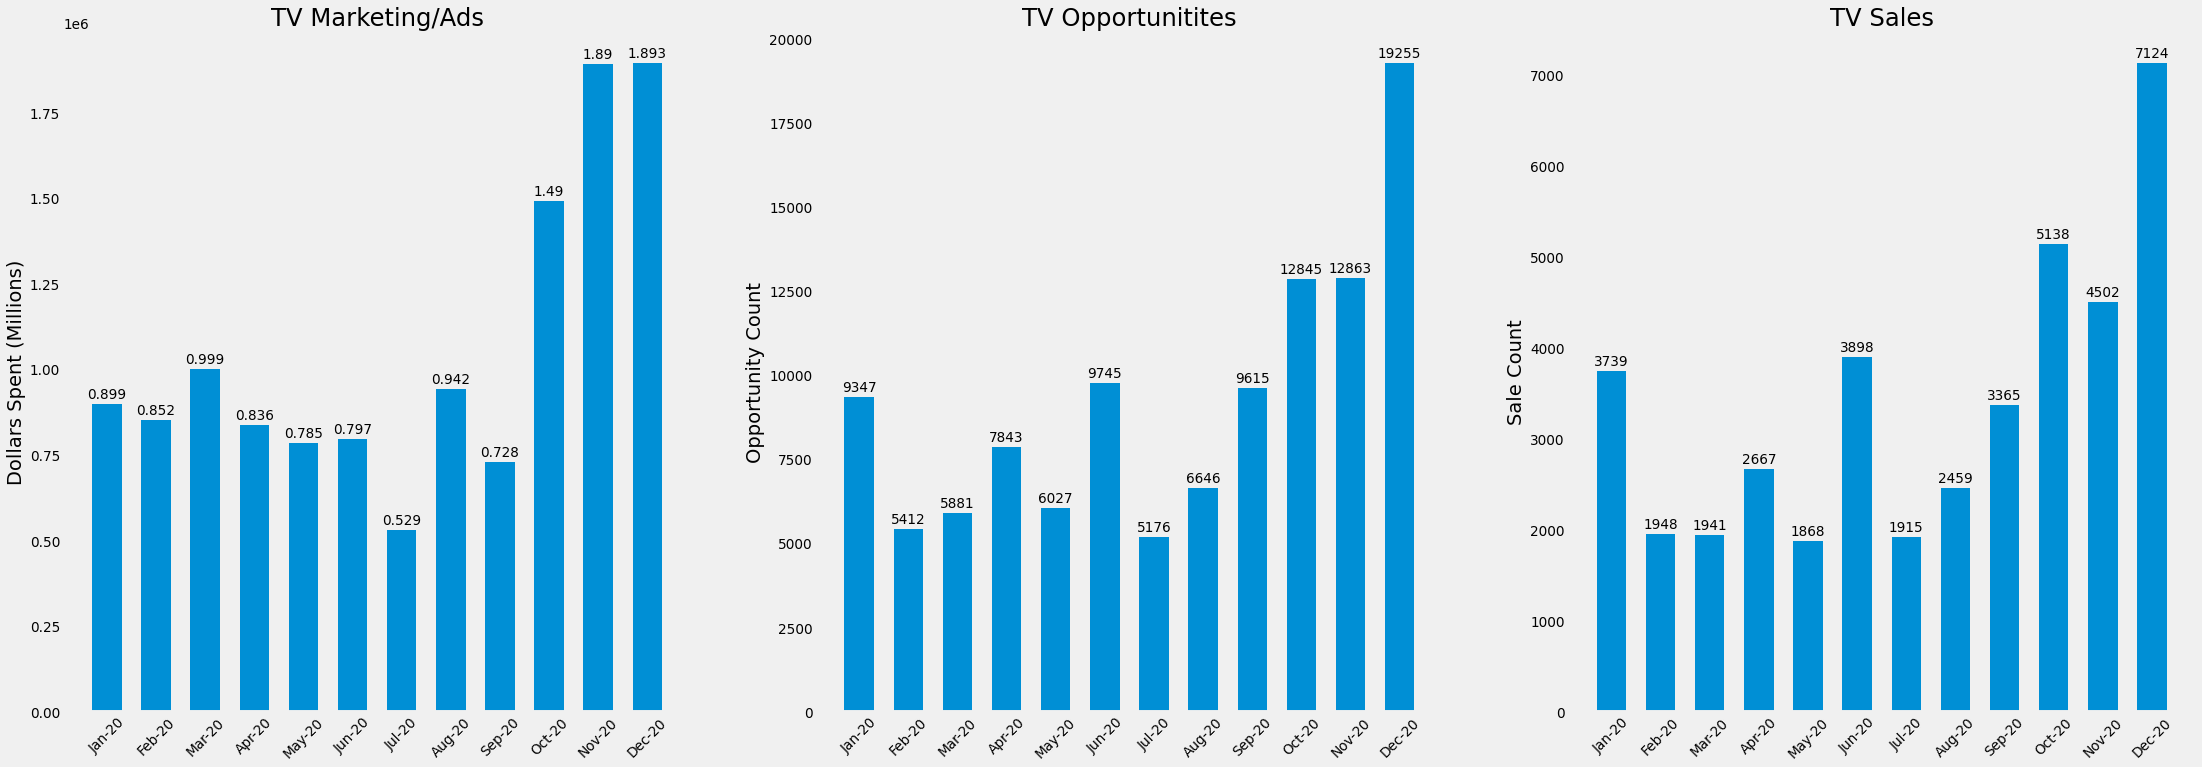

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(tv.index, tv.spend, 0.6)
ax[0].set_ylabel('Dollars Spent (Millions)', fontsize=20)
ax[0].set_title('TV Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(tv.index, rotation=45)

rect2 = ax[1].bar(tv.index, tv['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('TV Opportunitites', fontsize=25)
ax[1].set_xticklabels(tv.index, rotation=45)


rect3 = ax[2].bar(tv.index, tv['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('TV Sales', fontsize=25)
ax[2].set_xticklabels(tv.index, rotation=45)

ax[0].grid(False)

ax[1].grid(False)

ax[2].grid(False)



autolabel(rect1, 0, million=True)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating tv_cac dictionary containing months as keys and the Customer Acquisition Cost for TV as values

In [140]:
tv_cac = {}
for m, x in enumerate(zip(list(tv.spend), list(tv.sales))):
    tv_cac.update({m+1: np.round((x[0]/x[1]), 2)})

### Creating tv_opp_sale_conversion dictionary containing months as keys and the percentage of opportunites resulting in sales for TV as values

In [141]:
tv_opp_sale_conversion = {}
for m, x in enumerate(zip(list(tv.opportunity), list(tv.sales))):
    tv_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

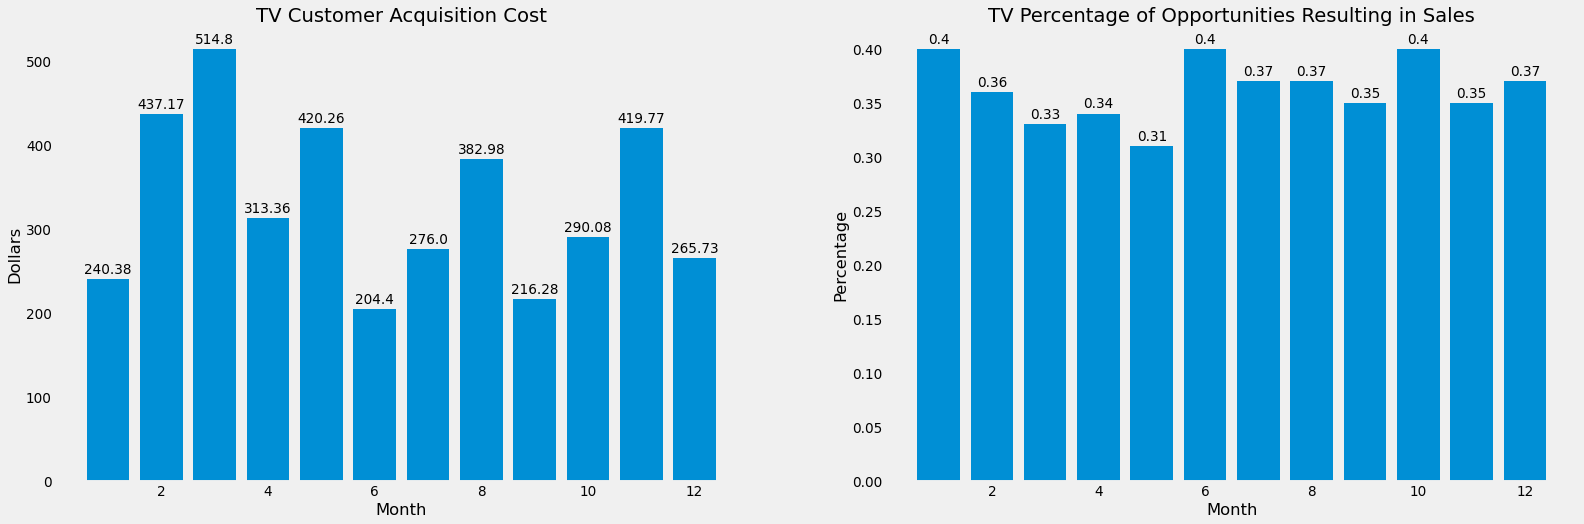

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(tv_cac.keys(), tv_cac.values())

ax[0].set_title('TV Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(tv_opp_sale_conversion.keys(), tv_opp_sale_conversion.values())
ax[1].set_title('TV Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

In [296]:
#count of opportunities not resulting in sales
tv['no_sale'] = [(x-i) for x, i in list(zip(tv.opportunity, tv.sales))]

#percentage of annual budget
tv['Spend_%'] = [x/prev_spend for x in tv.spend]

#percentage of channel's annual budget
tv['Spend_%_tv_budget'] = [(x/tv.spend.sum()) for x in tv.spend]

#percentage of all opportunities
tv['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(tv.opportunity, opp_transposed.monthly_total))]    

#percentage of annual sales acquired by marketing channel
tv['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(tv.sales, sales_transposed.monthly_total))]    

#Customer Acquisition Cost
tv['CAC'] = tv_cac.values()

#Sales/Opportunities Conversion
tv['%_Opp->Sale'] = tv_opp_sale_conversion.values()

#2021 Budget
tv['new_spend'] = [(x*new_spend) for x in tv['Spend_%']]

tv

,spend,opportunity,sales,no_sale,Spend_%,Spend_%_tv_budget,Opp_%,Sale_%,CAC,%_Opp->Sale,new_spend
Jan-20,898785,9347,3739,5608,0.0350,0.0711,0.5050,0.6180,240.3800,0.4000,1118716.7403
Feb-20,851612,5412,1948,3464,0.0331,0.0674,0.3440,0.4240,437.1700,0.3600,1060000.5570
Mar-20,999230,5881,1941,3940,0.0389,0.0791,0.4220,0.4860,514.8000,0.3300,1243740.5257
Apr-20,835727,7843,2667,5176,0.0325,0.0661,0.4870,0.5540,313.3600,0.3400,1040228.5143
May-20,785051,6027,1868,4159,0.0305,0.0621,0.4250,0.4420,420.2600,0.3100,977152.1506
Jun-20,796760,9745,3898,5847,0.0310,0.0630,0.5270,0.6280,204.4000,0.4000,991726.3305
Jul-20,528539,5176,1915,3261,0.0206,0.0418,0.3900,0.4540,276.0000,0.3700,657871.9351
Aug-20,941742,6646,2459,4187,0.0366,0.0745,0.4680,0.5790,382.9800,0.3700,1172185.2728
Sep-20,727769,9615,3365,6250,0.0283,0.0576,0.5890,0.6560,216.2800,0.3500,905853.3057
Oct-20,1490451,12845,5138,7707,0.0580,0.1179,0.4430,0.5340,290.0800,0.4000,1855162.7856


# 

# 

# 

# 

# Mail Marketing/Ads

In [144]:
mail = pd.DataFrame(spend_transposed['Mail'])
mail.rename(columns={'Mail': 'spend'}, inplace=True)
mail['opportunity'] = opp_transposed['Mail']
mail['sales'] = sales_transposed['Mail']
mail

,spend,opportunity,sales
Jan-20,134680,1419,326
Feb-20,72234,1482,311
Mar-20,131934,648,149
Apr-20,137912,1212,206
May-20,142028,1381,345
Jun-20,69507,1220,293
Jul-20,87944,748,180
Aug-20,102032,1354,203
Sep-20,54602,1044,209
Oct-20,236124,2518,478


In [145]:
mail_stats = pd.DataFrame()
for x in mail:
    mail_stats[x] = mail[x].describe()
    
mail_stats

,spend,opportunity,sales
count,12.0000,12.0000,12.0000
mean,138418.0833,1395.8333,285.8333
std,70193.2214,532.3751,98.3970
min,54602.0000,648.0000,149.0000
25%,84016.5000,1170.0000,205.2500
50%,133307.0000,1367.5000,302.0000
75%,161398.7500,1489.2500,335.2500
max,272509.0000,2518.0000,478.0000


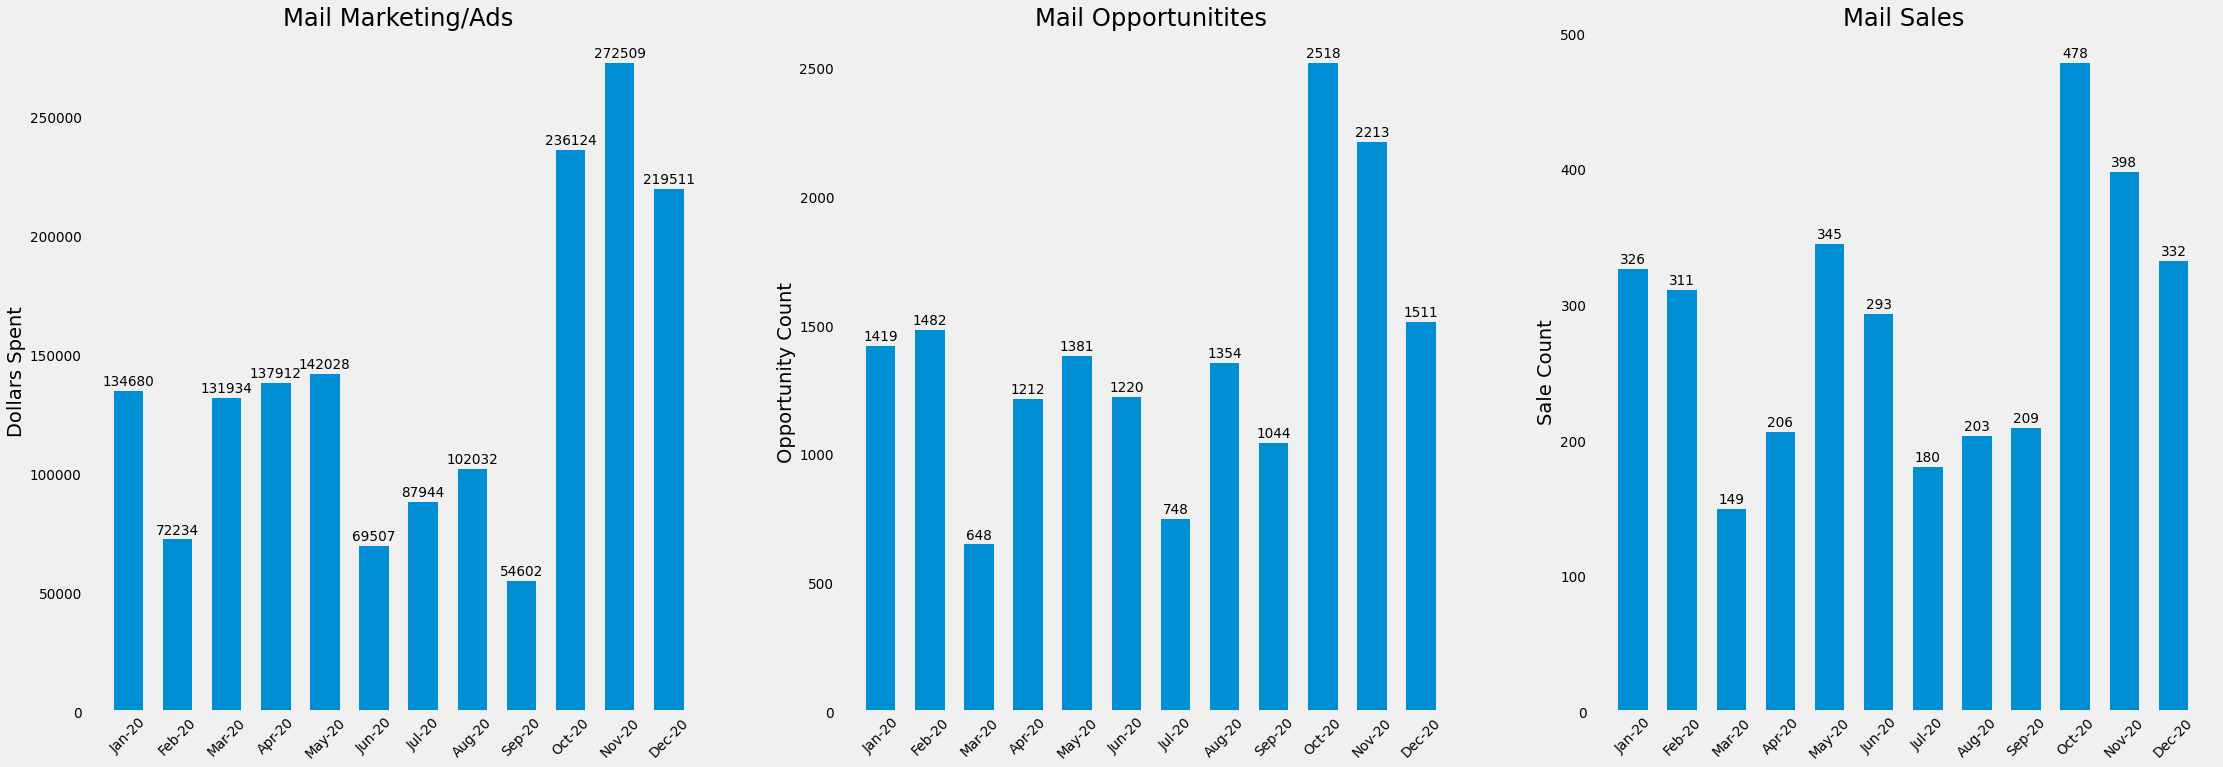

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(mail.index, mail.spend, 0.6)
ax[0].set_ylabel('Dollars Spent', fontsize=20)
ax[0].set_title('Mail Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(mail.index, rotation=45)

rect2 = ax[1].bar(mail.index, mail['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('Mail Opportunitites', fontsize=25)
ax[1].set_xticklabels(mail.index, rotation=45)


rect3 = ax[2].bar(mail.index, mail['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('Mail Sales', fontsize=25)
ax[2].set_xticklabels(mail.index, rotation=45)

ax[0].grid(False)

ax[1].grid(False)

ax[2].grid(False)


autolabel(rect1, 0)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating mail_cac dictionary containing months as keys and the Customer Acquisition Cost for Mail as values

In [147]:
mail_cac = {}
for m, x in enumerate(zip(list(mail.spend), list(mail.sales))):
    mail_cac.update({m+1: np.round((x[0]/x[1]), 2)})

### Creating mail_opp_sale_conversion dictionary containing months as keys and the percentage of opportunities resulting in sales for mail as values

In [148]:
mail_opp_sale_conversion = {}
for m, x in enumerate(zip(list(mail.opportunity), list(mail.sales))):
    mail_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

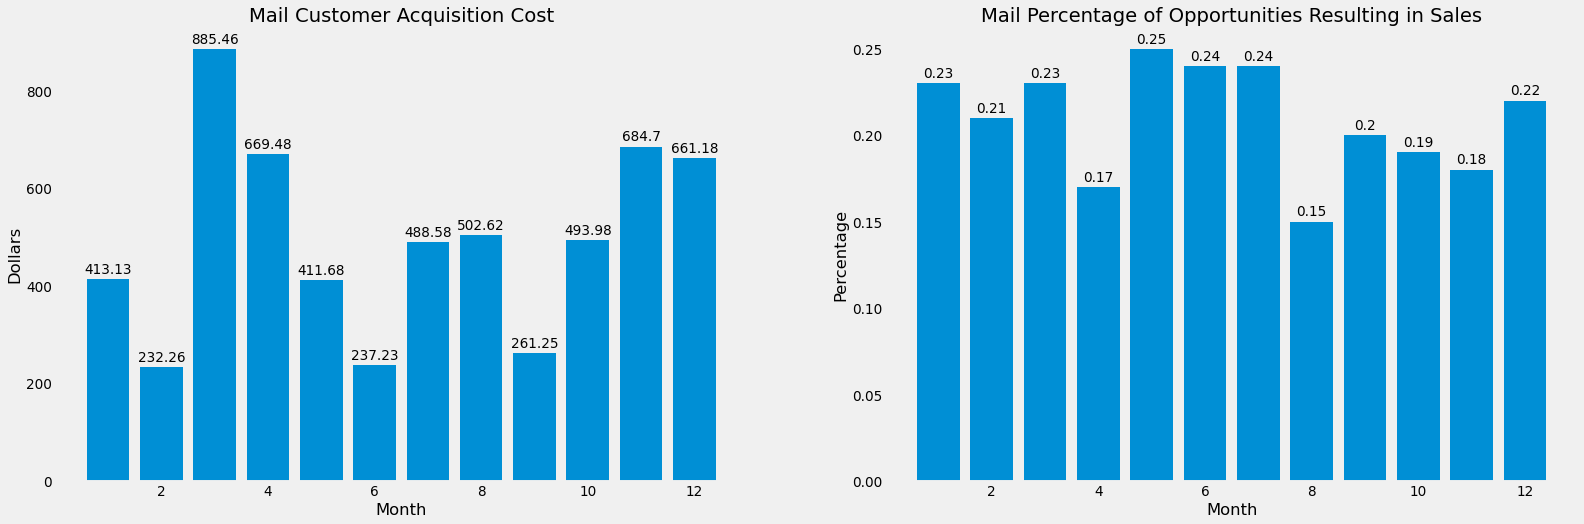

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(mail_cac.keys(), mail_cac.values())

ax[0].set_title('Mail Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(mail_opp_sale_conversion.keys(), mail_opp_sale_conversion.values())
ax[1].set_title('Mail Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

In [297]:
#count of opportunities not resulting in sales
mail['no_sale'] = [(x-i) for x, i in list(zip(mail.opportunity, mail.sales))]

#percentage of annual budget
mail['Spend_%'] = [x/prev_spend for x in mail.spend]

#percentage of channel's annual budget
mail['Spend_%_mail_budget'] = [(x/mail.spend.sum()) for x in mail.spend]

#percentage of all opportunities
mail['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(mail.opportunity, opp_transposed.monthly_total))]    

#percentage of annual sales acquired by marketing channel
mail['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(mail.sales, sales_transposed.monthly_total))]    

#Customer Acquisition Cost
mail['CAC'] = mail_cac.values()

#Sales/Opportunities Conversion
mail['%_Opp->Sale'] = mail_opp_sale_conversion.values()

#2021 Budget
mail['new_spend'] = [(x*new_spend) for x in mail['Spend_%']]

mail

,spend,opportunity,sales,no_sale,Spend_%,Spend_%_mail_budget,Opp_%,Sale_%,CAC,%_Opp->Sale,new_spend
Jan-20,134680,1419,326,1093,0.0052,0.0811,0.0770,0.0540,413.1300,0.2300,167636.0538
Feb-20,72234,1482,311,1171,0.0028,0.0435,0.0940,0.0680,232.2600,0.2100,89909.5835
Mar-20,131934,648,149,499,0.0051,0.0794,0.0470,0.0370,885.4600,0.2300,164218.1105
Apr-20,137912,1212,206,1006,0.0054,0.0830,0.0750,0.0430,669.4800,0.1700,171658.9207
May-20,142028,1381,345,1036,0.0055,0.0855,0.0970,0.0820,411.6800,0.2500,176782.1016
Jun-20,69507,1220,293,927,0.0027,0.0418,0.0660,0.0470,237.2300,0.2400,86515.2895
Jul-20,87944,748,180,568,0.0034,0.0529,0.0560,0.0430,488.5800,0.2400,109463.8039
Aug-20,102032,1354,203,1151,0.0040,0.0614,0.0950,0.0480,502.6200,0.1500,126999.1226
Sep-20,54602,1044,209,835,0.0021,0.0329,0.0640,0.0410,261.2500,0.2000,67963.0517
Oct-20,236124,2518,478,2040,0.0092,0.1422,0.0870,0.0500,493.9800,0.1900,293903.2934


# 

# 

# 

# 

# Other Marketing/Ads

In [151]:
other = pd.DataFrame(spend_transposed['Other'])
other.rename(columns={'Other': 'spend'}, inplace=True)
other['opportunity'] = opp_transposed['Other']
other['sales'] = sales_transposed['Other']
other

,spend,opportunity,sales
Jan-20,9681,61,4
Feb-20,7285,59,4
Mar-20,9434,99,6
Apr-20,6596,95,9
May-20,8638,73,7
Jun-20,8374,93,7
Jul-20,5079,74,4
Aug-20,8589,94,8
Sep-20,9671,64,6
Oct-20,9437,50,4


In [152]:
other_stats = pd.DataFrame()
for x in other:
    other_stats[x] = other[x].describe()
    
other_stats

,spend,opportunity,sales
count,12.0000,12.0000,12.0000
mean,8064.5000,74.8333,5.9167
std,1518.3411,16.4141,1.7299
min,5079.0000,50.0000,4.0000
25%,7112.7500,63.2500,4.0000
50%,8481.5000,71.0000,6.0000
75%,9434.7500,93.2500,7.0000
max,9681.0000,99.0000,9.0000


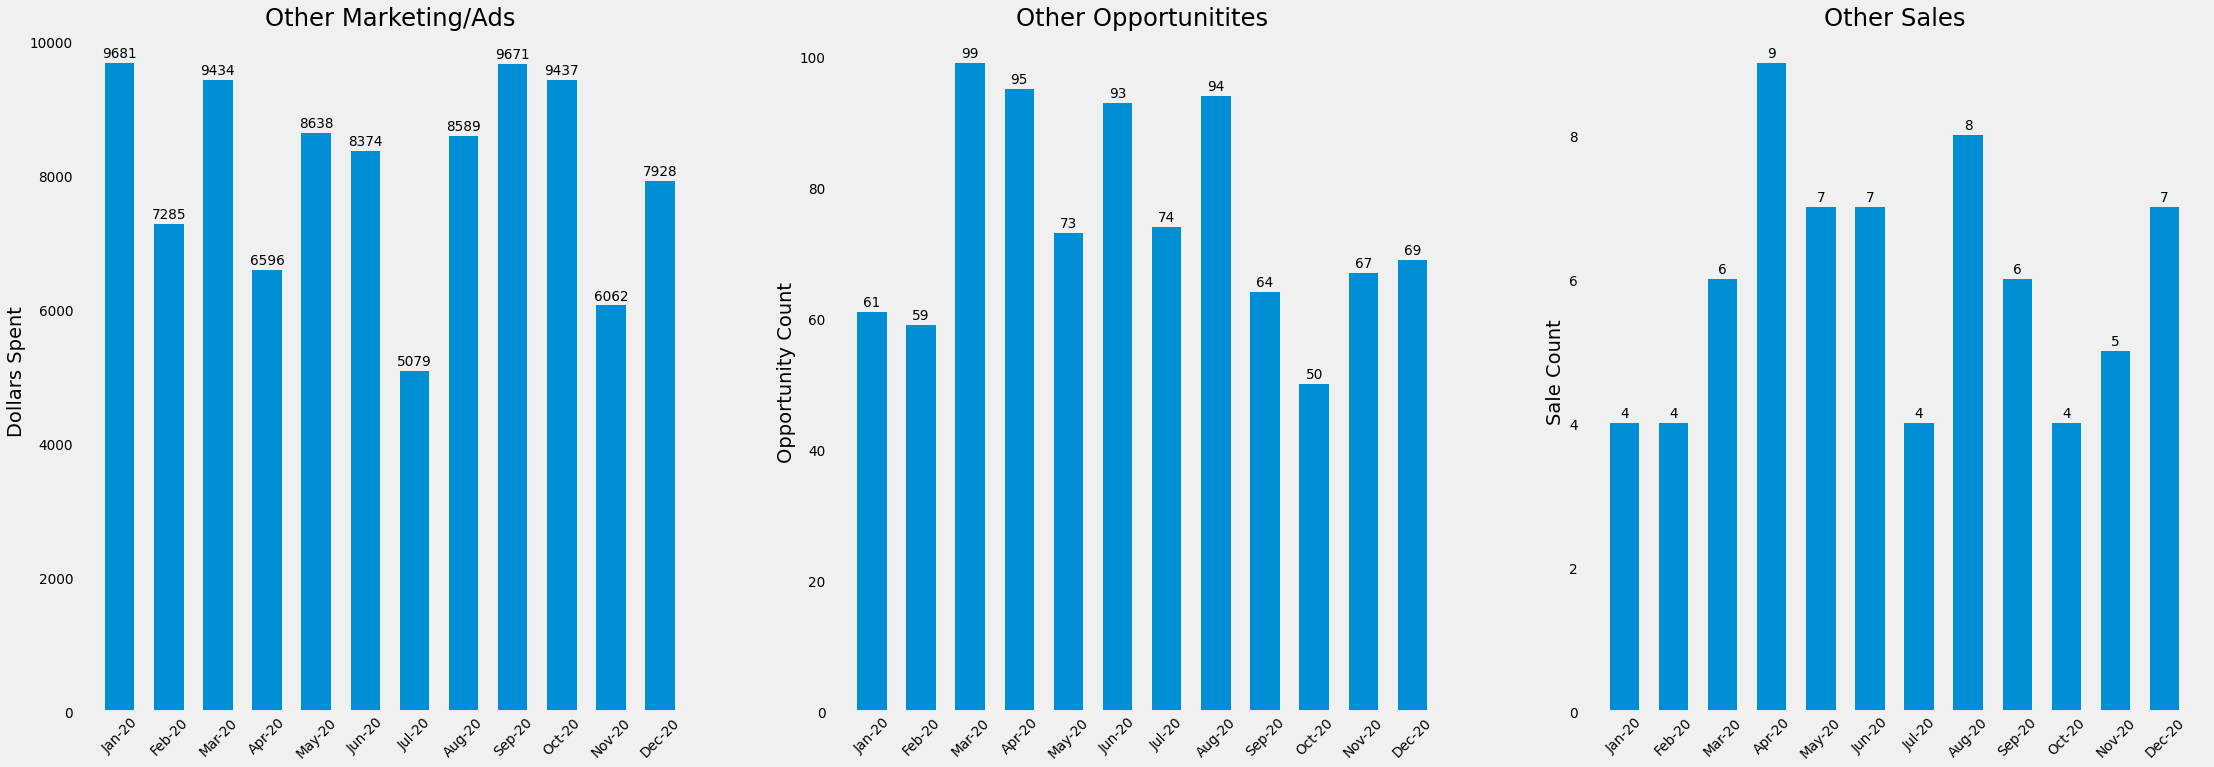

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(other.index, other.spend, 0.6)
ax[0].set_ylabel('Dollars Spent', fontsize=20)
ax[0].set_title('Other Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(other.index, rotation=45)

rect2 = ax[1].bar(other.index, other['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('Other Opportunitites', fontsize=25)
ax[1].set_xticklabels(other.index, rotation=45)


rect3 = ax[2].bar(other.index, other['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('Other Sales', fontsize=25)
ax[2].set_xticklabels(other.index, rotation=45)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

autolabel(rect1, 0)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating other_cac dictionary containing months as keys and the Customer Acquisition Cost for Other as values

In [154]:
other_cac = {}
for m, x in enumerate(zip(list(other.spend), list(other.sales))):
    other_cac.update({m+1: np.round((x[0]/x[1]), 2)})

### Creating other_opp_sale_conversion dictionary containing months as keys and the percentage of opportunities resulting in sales for Other as values


In [155]:
other_opp_sale_conversion = {}
for m, x in enumerate(zip(list(other.opportunity), list(other.sales))):
    other_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

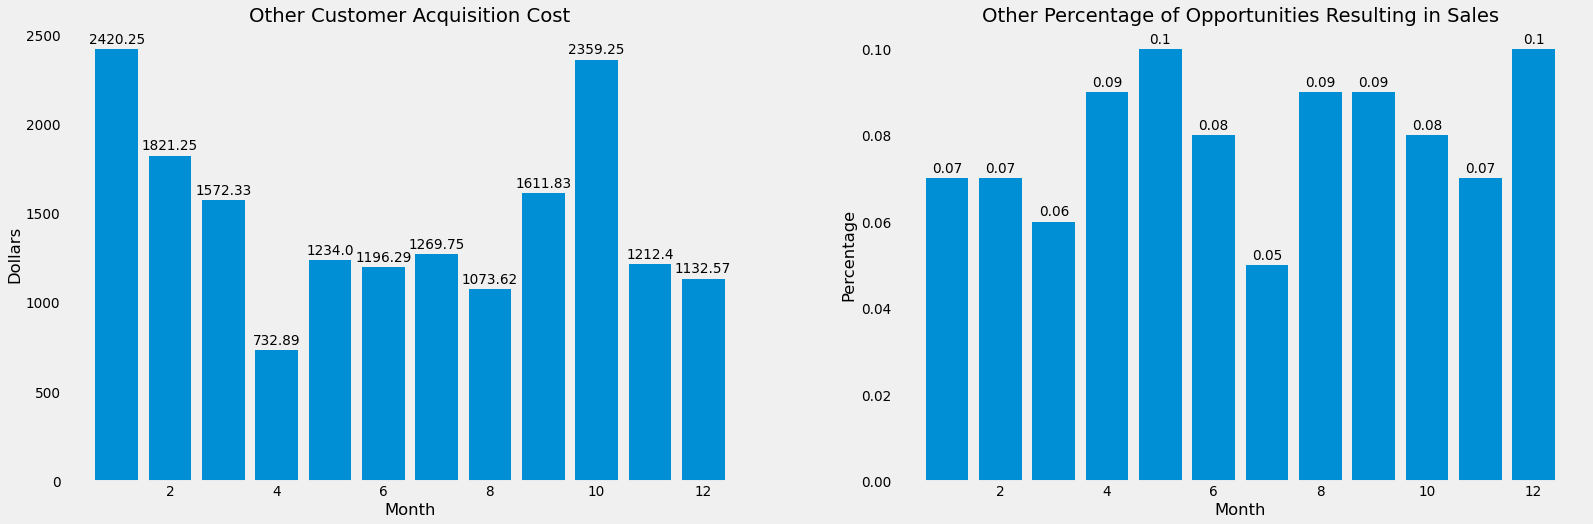

In [156]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(other_cac.keys(), other_cac.values())

ax[0].set_title('Other Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(other_opp_sale_conversion.keys(), other_opp_sale_conversion.values())
ax[1].set_title('Other Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

In [157]:
other_cac

{1: 2420.25,
 2: 1821.25,
 3: 1572.33,
 4: 732.89,
 5: 1234.0,
 6: 1196.29,
 7: 1269.75,
 8: 1073.62,
 9: 1611.83,
 10: 2359.25,
 11: 1212.4,
 12: 1132.57}

In [298]:
#count of opportunities not resulting in sales
other['no_sale'] = [(x-i) for x, i in list(zip(other.opportunity, other.sales))]

#percentage of annual budget
other['Spend_%'] = [x/prev_spend for x in other.spend]

#percentage of channel's annual budget
other['Spend_%_other_budget'] = [(x/other.spend.sum()) for x in other.spend]

#percentage of all opportunities
other['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(other.opportunity, opp_transposed.monthly_total))]    

#percentage of annual sales acquired by marketing channel
other['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(other.sales, sales_transposed.monthly_total))]    

#Customer Acquisition Cost
other['CAC'] = other_cac.values()

#Sales/Opportunities Conversion
other['%_Opp->Sale'] = other_opp_sale_conversion.values()

#2021 Budget
other['new_spend'] = [(x*new_spend) for x in other['Spend_%']]

other

,spend,opportunity,sales,no_sale,Spend_%,Spend_%_other_budget,Opp_%,Sale_%,CAC,%_Opp->Sale,new_spend
Jan-20,9681,61,4,57,0.0004,0.1000,0.0030,0.0010,2420.2500,0.0700,12049.9305
Feb-20,7285,59,4,55,0.0003,0.0753,0.0040,0.0010,1821.2500,0.0700,9067.6318
Mar-20,9434,99,6,93,0.0004,0.0975,0.0070,0.0020,1572.3300,0.0600,11742.4898
Apr-20,6596,95,9,86,0.0003,0.0682,0.0060,0.0020,732.8900,0.0900,8210.0342
May-20,8638,73,7,66,0.0003,0.0893,0.0050,0.0020,1234.0000,0.1000,10751.7095
Jun-20,8374,93,7,86,0.0003,0.0865,0.0050,0.0010,1196.2900,0.0800,10423.1090
Jul-20,5079,74,4,70,0.0002,0.0525,0.0060,0.0010,1269.7500,0.0500,6321.8259
Aug-20,8589,94,8,86,0.0003,0.0888,0.0070,0.0020,1073.6200,0.0900,10690.7192
Sep-20,9671,64,6,58,0.0004,0.0999,0.0040,0.0010,1611.8300,0.0900,12037.4835
Oct-20,9437,50,4,46,0.0004,0.0975,0.0020,0.0000,2359.2500,0.0800,11746.2239


# 

# 

# 

# 

### Creating channel_budget_allocation dictionary containing marketing channels as keys and the annual total spend on marketing/ads as values

In [159]:
spend['channel_total'] = spend.sum(axis=1)

In [160]:
channel_budget_allocation = {}
for k,v in list(zip(spend.index, spend.channel_total)):
    channel_budget_allocation.update({k: v})
df = pd.DataFrame(channel_budget_allocation.items(), columns=['Channel', 'Allocation'])

channel_total_percentage = {}
for k,v in channel_budget_allocation.items():
    channel_total_percentage.update({k: (v/sum(list(channel_budget_allocation.values())))})
df.merge(pd.DataFrame(channel_total_percentage.items(), columns=['Channel', '%']))

,Channel,Allocation,%
0,Google Display,5747059,0.2235
1,Facebook,5565604,0.2165
2,TV,12638574,0.4916
3,Mail,1661017,0.0646
4,Other,96774,0.0038


In [300]:
new_budget

""
0
1
2
3
4
5
6
7
8
9


In [303]:
#New Budget dataframe contatining monthly budget allocation
new_budget = pd.DataFrame(spend.columns)
new_budget.drop(0, axis=1, inplace=True)
new_budget['Google_Display'] = google['new_spend'].values
new_budget['FaceBook'] = facebook['new_spend'].values
new_budget['TV'] = tv['new_spend'].values
new_budget['Mail'] = mail['new_spend'].values
new_budget['Other'] = other['new_spend'].values
new_budget.index.name = None
new_budget['Total'] = new_budget.sum(axis=1)
new_budget.index = (['Jan-21', 'Feb-21', 'March-21', 'April-21', 'May-21',
                     'June-21', 'July-21', 'Aug-21', 'Sep-21', 'Oct-21',
                     'Nov-21', 'Dec-21'])
new_budget

,Google_Display,FaceBook,TV,Mail,Other,Total
Jan-21,328351.5814,366333.5697,1118716.7403,167636.0538,12049.9305,1993087.8756
Feb-21,612847.4402,388811.5879,1060000.5570,89909.5835,9067.6318,2160636.8004
March-21,528730.6856,486905.0670,1243740.5257,164218.1105,11742.4898,2435336.8785
April-21,345493.5753,541394.2526,1040228.5143,171658.9207,8210.0342,2106985.2971
May-21,385816.8422,546139.0450,977152.1506,176782.1016,10751.7095,2096641.8489
June-21,487778.8456,358954.9943,991726.3305,86515.2895,10423.1090,1935398.5689
July-21,619337.3005,514943.1554,657871.9351,109463.8039,6321.8259,1907938.0208
Aug-21,408125.5814,414248.2555,1172185.2728,126999.1226,10690.7192,2132248.9516
Sep-21,385727.2239,351824.1141,905853.3057,67963.0517,12037.4835,1723405.1789
Oct-21,791935.9690,907598.3736,1855162.7856,293903.2934,11746.2239,3860346.6455


In [162]:
channel_budget_allocation

{'Google Display': 5747059,
 'Facebook': 5565604,
 'TV': 12638574,
 'Mail': 1661017,
 'Other': 96774}

In [304]:
#monthly_budget_percent containing the percentages of each channel's annual budget

dfs = [google, facebook, tv, mail, other] 

monthly_budget_percent = pd.DataFrame()

monthly_budget_percent['google'] = google['Spend_%_google_budget']
monthly_budget_percent['facebook'] = facebook['Spend_%_facebook_budget']
monthly_budget_percent['tv'] = tv['Spend_%_tv_budget']
monthly_budget_percent['mail'] = mail['Spend_%_mail_budget']
monthly_budget_percent['other'] = other['Spend_%_other_budget']
monthly_budget_percent

,google,facebook,tv,mail,other
Jan-20,0.0459,0.0529,0.0711,0.0811,0.1000
Feb-20,0.0857,0.0561,0.0674,0.0435,0.0753
Mar-20,0.0739,0.0703,0.0791,0.0794,0.0975
Apr-20,0.0483,0.0782,0.0661,0.0830,0.0682
May-20,0.0539,0.0788,0.0621,0.0855,0.0893
Jun-20,0.0682,0.0518,0.0630,0.0418,0.0865
Jul-20,0.0866,0.0743,0.0418,0.0529,0.0525
Aug-20,0.0571,0.0598,0.0745,0.0614,0.0888
Sep-20,0.0539,0.0508,0.0576,0.0329,0.0999
Oct-20,0.1107,0.1310,0.1179,0.1422,0.0975


In [305]:
#monthly_budget_percent_entire_budget containing the percentage of the entire budget each channel used by month
monthly_budget_percent_entire_budget = pd.DataFrame()

monthly_budget_percent_entire_budget['google'] = google['Spend_%']
monthly_budget_percent_entire_budget['facebook'] = facebook['Spend_%']
monthly_budget_percent_entire_budget['tv'] = tv['Spend_%']
monthly_budget_percent_entire_budget['mail'] = mail['Spend_%']
monthly_budget_percent_entire_budget['other'] = other['Spend_%']
monthly_budget_percent_entire_budget

,google,facebook,tv,mail,other
Jan-20,0.0103,0.0114,0.0350,0.0052,0.0004
Feb-20,0.0192,0.0122,0.0331,0.0028,0.0003
Mar-20,0.0165,0.0152,0.0389,0.0051,0.0004
Apr-20,0.0108,0.0169,0.0325,0.0054,0.0003
May-20,0.0121,0.0171,0.0305,0.0055,0.0003
Jun-20,0.0152,0.0112,0.0310,0.0027,0.0003
Jul-20,0.0194,0.0161,0.0206,0.0034,0.0002
Aug-20,0.0128,0.0129,0.0366,0.0040,0.0003
Sep-20,0.0121,0.0110,0.0283,0.0021,0.0004
Oct-20,0.0247,0.0284,0.0580,0.0092,0.0004


# 

# 

# 

# 

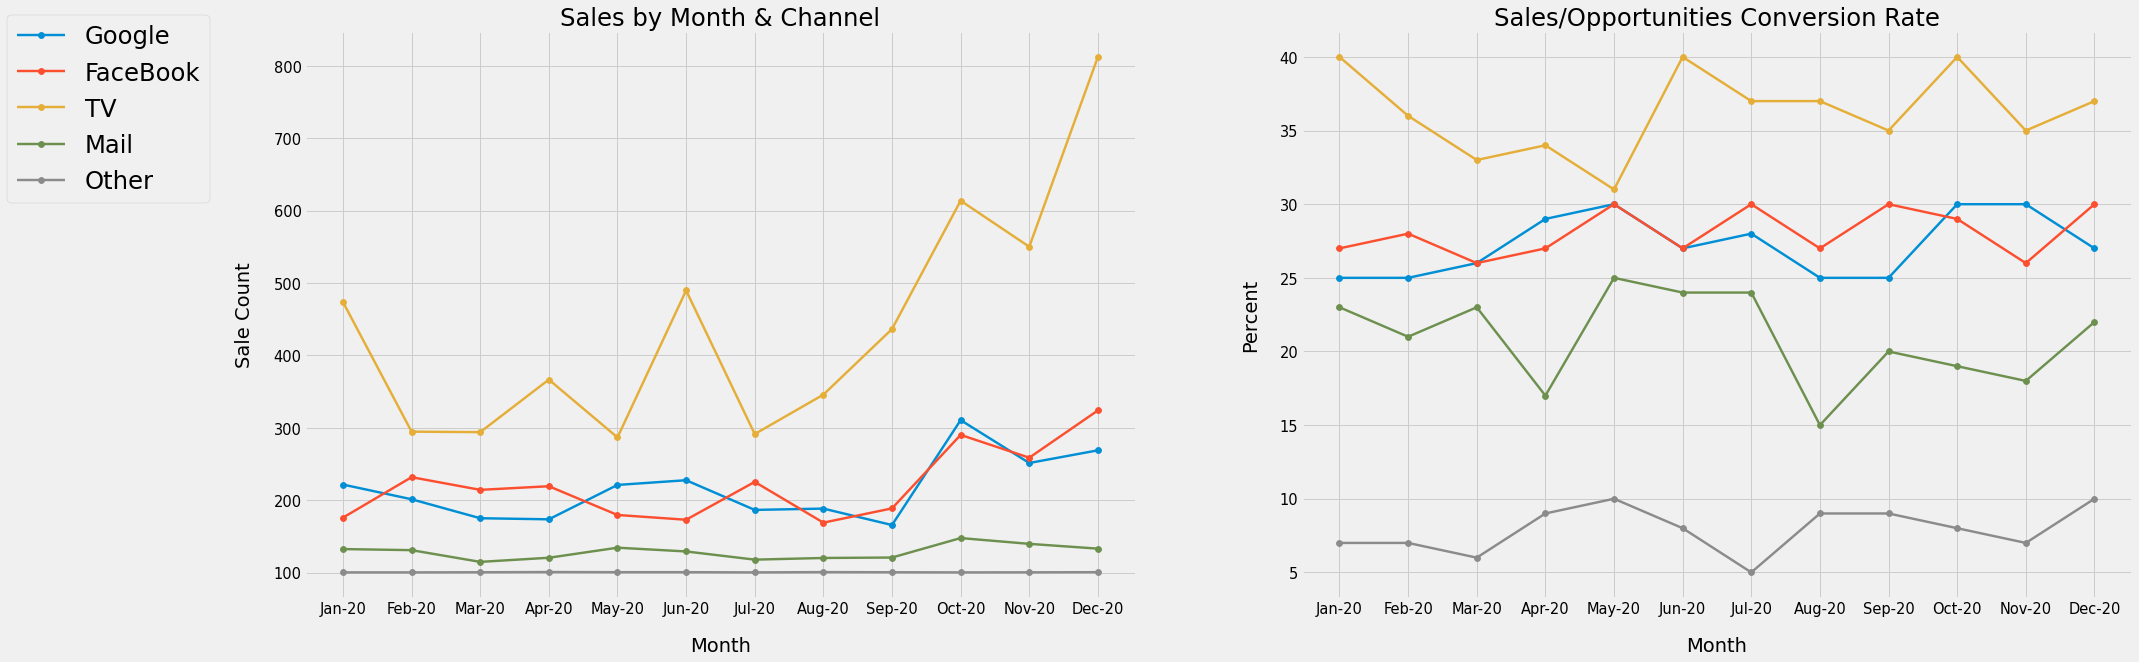

In [306]:
fig, ax = plt.subplots(1,2,figsize=(30,10), dpi=70)
ax[0].set_title('Sales by Month & Channel', fontsize=25)
ax[0].set_xlabel('Month', fontsize=20, labelpad=20)
ax[0].set_ylabel('Sale Count', fontsize=20, labelpad=20)
ax[0].set_xticks(ticks=list(range(0,12, 1)))
ax[0].set_xticklabels(google.index, fontsize=15, rotation=45)
ax[0].set_yticklabels(list(range(0, 900, 100)), fontsize=15)

google['sales'].plot(label='Google', marker='o', lw=2.5, ax=ax[0])
facebook['sales'].plot(label='FaceBook', marker='o', lw=2.5, ax=ax[0])
tv['sales'].plot(label='TV', marker='o', lw=2.5, ax=ax[0])
mail['sales'].plot(label='Mail', marker='o', lw=2.5, ax=ax[0])
other['sales'].plot(label='Other', marker='o', lw=2.5, ax=ax[0])


ax[1].set_title('Sales/Opportunities Conversion Rate', fontsize=25)
ax[1].set_xlabel('Month', fontsize=20, labelpad=20)
ax[1].set_ylabel('Percent', fontsize=20, labelpad=20)
ax[1].set_xticks(ticks=list(range(0,12, 1)))
ax[1].set_xticklabels(google.index, fontsize=15, rotation=45)


(google['%_Opp->Sale']*100).plot(label='Google', marker='o', lw=2.5, ax=ax[1])
(facebook['%_Opp->Sale']*100).plot(label='FaceBook', marker='o', lw=2.5, ax=ax[1])
(tv['%_Opp->Sale']*100).plot(label='TV', marker='o', lw=2.5, ax=ax[1])
(mail['%_Opp->Sale']*100).plot(label='Mail', marker='o', lw=2.5, ax=ax[1])
(other['%_Opp->Sale']*100).plot(label='Other', marker='o', lw=2.5, ax=ax[1])


plt.yticks(fontsize=15)
plt.legend(loc='best', prop={'size': 25}, framealpha=5, bbox_to_anchor=(-1.45,.9, .15, .15));

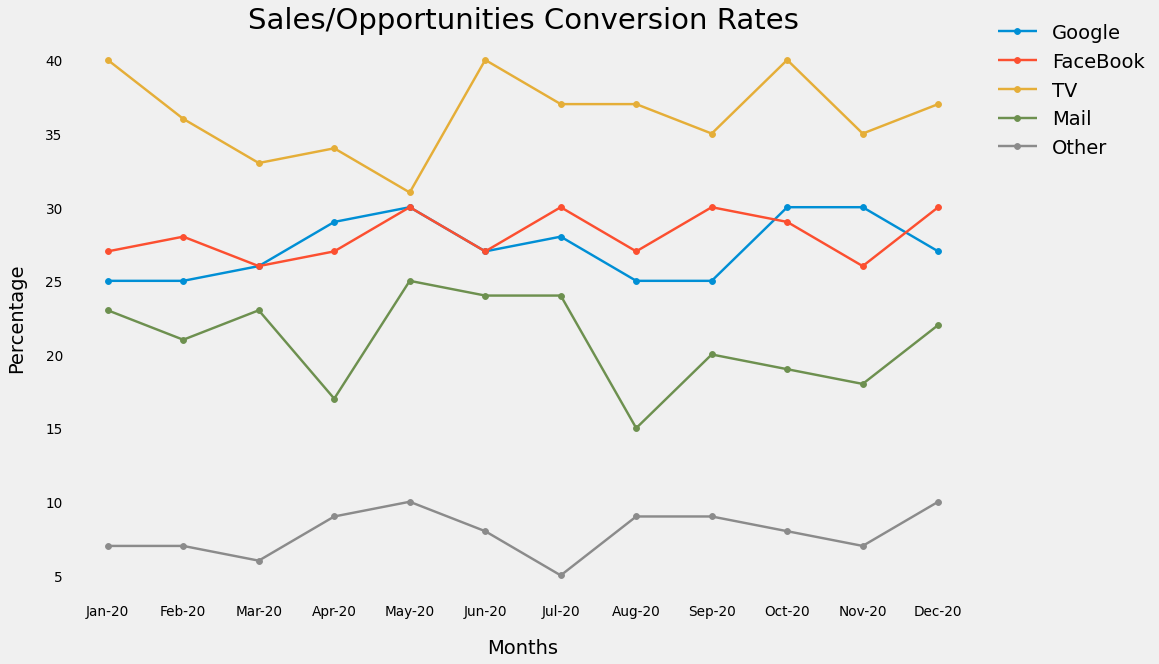

In [285]:
fig, ax = plt.subplots(figsize=(15,10), dpi=70)
ax.set_title('Sales/Opportunities Conversion Rates', fontsize=30)
ax.set_xlabel('Months', fontsize=20, labelpad=20)
ax.set_ylabel('Percentage', fontsize=20, labelpad=20)
ax.set_xticks(ticks=list(range(0,12, 1)))


(google['%_Opp->Sale']*100).plot(label='Google', marker='o', lw=2.5)
(facebook['%_Opp->Sale']*100).plot(label='FaceBook', marker='o', lw=2.5)
(tv['%_Opp->Sale']*100).plot(label='TV', marker='o', lw=2.5)
(mail['%_Opp->Sale']*100).plot(label='Mail', marker='o', lw=2.5)
(other['%_Opp->Sale']*100).plot(label='Other', marker='o', lw=2.5)

ax.grid(False)
ax.legend(loc='best', prop={'size': 20}, framealpha=0, bbox_to_anchor=(.6,.45,.6,.6));

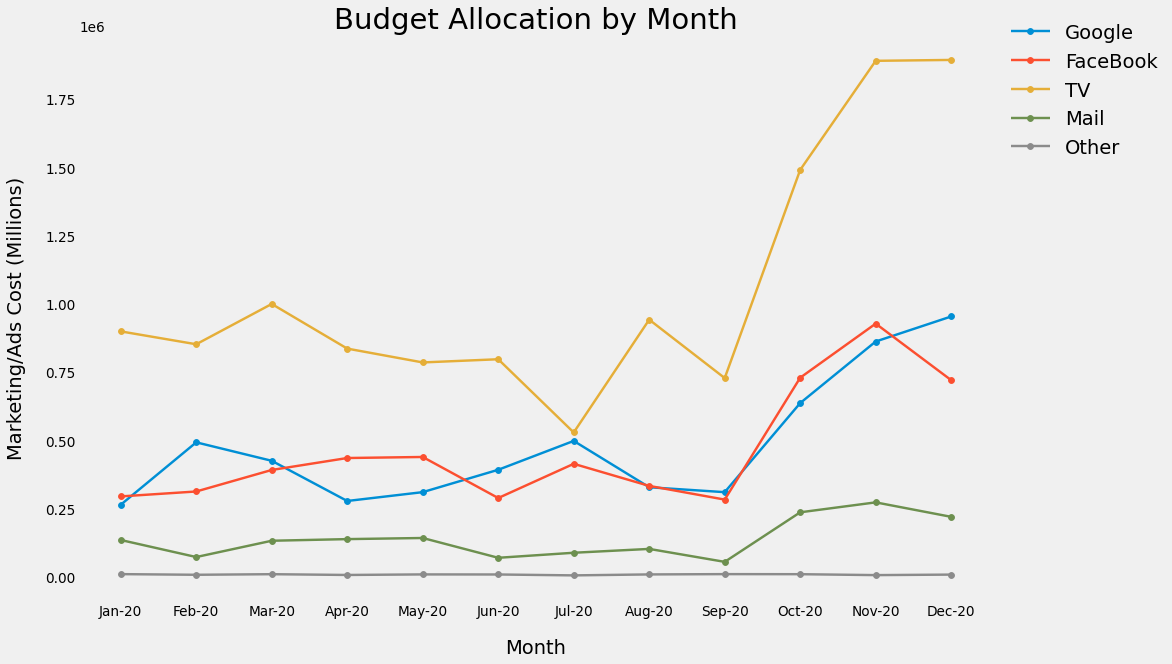

In [207]:
fig, ax = plt.subplots(figsize=(15,10), dpi=70)
ax.plot(spend_transposed['Google Display'], label='Google', marker='o', lw=2.5)
ax.plot(spend_transposed['Facebook'], label='FaceBook', marker='o', lw=2.5)
ax.plot(spend_transposed['TV'], label='TV', marker='o', lw=2.5)
ax.plot(spend_transposed['Mail'], label='Mail', marker='o', lw=2.5)
ax.plot(spend_transposed['Other'], label='Other', marker='o', lw=2.5)
ax.set_ylabel('Marketing/Ads Cost (Millions)', fontsize=20, labelpad=20)
ax.set_xlabel('Month', fontsize=20, labelpad=20)
ax.set_title('Budget Allocation by Month', fontsize=30)
ax.grid(False)
ax.legend(loc='best', prop={'size': 20}, framealpha=0, bbox_to_anchor=(.6,.45,.6,.6));

# 

# 

# 

# 

# Annual Analysis

In [169]:
opp.sum(axis=1)

Opportunities
Google Display     50728
Facebook           51555
TV                110655
Mail               16750
Other                898
dtype: int64

In [307]:
#total number of opportunities
total_opportunities_ct = opp.sum(axis=1).sum()
#total number of sales
total_sales_ct = sales.sum(axis=1).sum()
total_sales = pd.DataFrame(sales_transposed.drop('monthly_total', axis=1).T.sum(axis=1))
total_sales = total_sales.rename(columns={0: 'Total_Sales'})
total_sales['%_of_Annual_Sales'] = [(x/total_sales_ct) for x in total_sales.Total_Sales]
total_sales['Channel_Total_Spend'] = channel_budget_allocation.values()
total_sales['%_Annual_Budget'] = channel_total_percentage.values()
total_sales['%_total_opp'] = [(x/total_opportunities_ct) for x in opp_total.drop('monthly_total')]
total_sales['opp->sale_%'] = [(x/i) for x,i in list(zip(total_sales.Total_Sales, opp_total))]
total_sales['opportunities_ct'] = opp.sum(axis=1)
total_sales

,Total_Sales,%_of_Annual_Sales,Channel_Total_Spend,%_Annual_Budget,%_total_opp,opp->sale_%,opportunities_ct
Sales,,,,,,,
Google Display,13931,0.1921,5747059,0.2235,0.2200,0.2746,50728
Facebook,14510,0.2001,5565604,0.2165,0.2236,0.2814,51555
TV,40564,0.5595,12638574,0.4916,0.4799,0.3666,110655
Mail,3430,0.0473,1661017,0.0646,0.0726,0.2048,16750
Other,71,0.0010,96774,0.0038,0.0039,0.0791,898


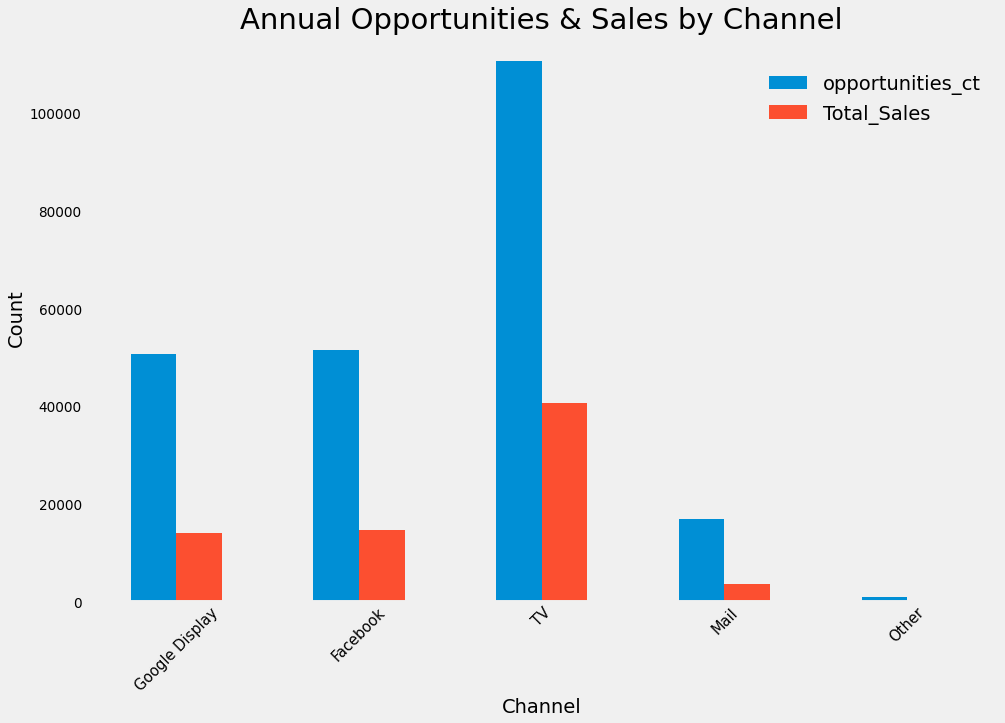

In [257]:
counts_df = total_sales.groupby(['opportunities_ct'], sort=False, as_index=False)['Total_Sales'].sum()
counts_df.index = total_sales.index

fig, ax = plt.subplots(figsize=(15,10), dpi=70)

counts_df.plot(kind="bar", ax=ax)
ax.set_title('Annual Opportunities & Sales by Channel', fontsize=30)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Channel', fontsize=20)
ax.set_xticklabels(total_sales.index, rotation=45, fontsize=15)
ax.legend(loc='best', prop={'size': 20}, framealpha=0, bbox_to_anchor=(.6,.36,.4,.6))
ax.grid(False);


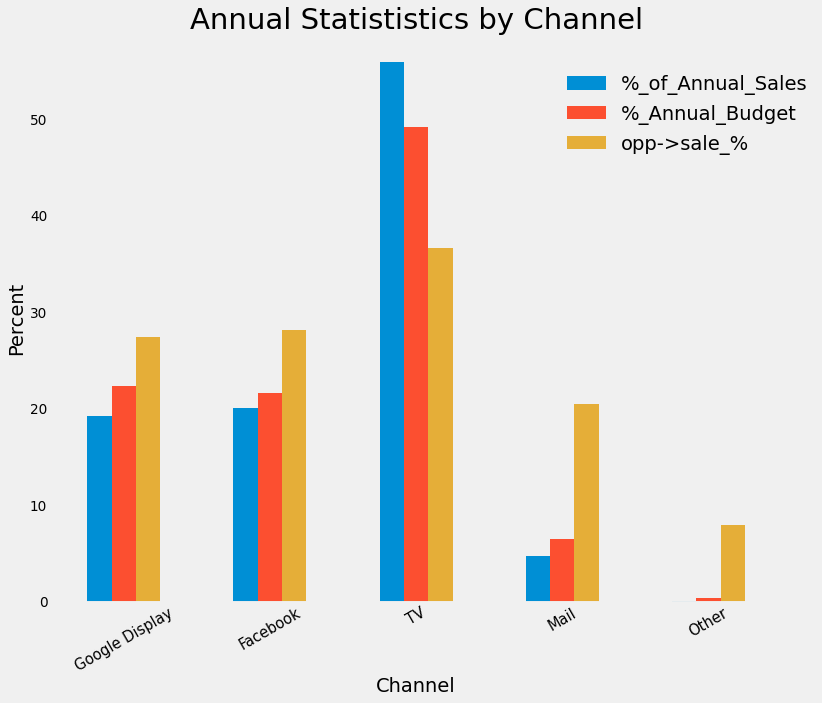

In [243]:
percents_df = total_sales.groupby(['%_of_Annual_Sales', '%_Annual_Budget'], sort=False, as_index=False)['opp->sale_%'].sum()
percents_df.index = total_sales.index
percents_df = percents_df.multiply(100)

fig, ax = plt.subplots(1,1, figsize=(12,10), dpi=70)

percents_df.plot(kind="bar", ax=ax)
ax.set_title('Annual Statististics by Channel', fontsize=30)
ax.set_ylabel('Percent', fontsize=20)
ax.set_xlabel('Channel', fontsize=20)
ax.set_xticklabels(percents_df.index, rotation=30, fontsize=15)
ax.grid(False)
ax.legend(loc='best', prop={'size': 20}, framealpha=0, bbox_to_anchor=(.6,.36,.46,.6));


In [177]:
total_sales.sort_values(['Total_Sales'], ascending=False)

,Total_Sales,%_of_Annual_Sales,Channel_Total_Spend,%_Annual_Budget,%_total_opp,opp->sale_%,opportunities_ct
Sales,,,,,,,
TV,40564,0.5595,12638574,0.4916,0.4799,0.3666,110655
Facebook,14510,0.2001,5565604,0.2165,0.2236,0.2814,51555
Google Display,13931,0.1921,5747059,0.2235,0.2200,0.2746,50728
Mail,3430,0.0473,1661017,0.0646,0.0726,0.2048,16750
Other,71,0.0010,96774,0.0038,0.0039,0.0791,898


In [183]:
new_budget.T

,Jan-21,Feb-21,March-21,April-21,May-21,June-21,July-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21
Google_Display,328351.5814,612847.4402,528730.6856,345493.5753,385816.8422,487778.8456,619337.3005,408125.5814,385727.2239,791935.9690,1072549.6118,1186663.6109
FaceBook,366333.5697,388811.5879,486905.0670,541394.2526,546139.0450,358954.9943,514943.1554,414248.2555,351824.1141,907598.3736,1154037.5622,896311.4436
TV,1118716.7403,1060000.5570,1243740.5257,1040228.5143,977152.1506,991726.3305,657871.9351,1172185.2728,905853.3057,1855162.7856,2352248.2452,2356333.3472
Mail,167636.0538,89909.5835,164218.1105,171658.9207,176782.1016,86515.2895,109463.8039,126999.1226,67963.0517,293903.2934,339191.6645,273225.1099
Other,12049.9305,9067.6318,11742.4898,8210.0342,10751.7095,10423.1090,6321.8259,10690.7192,12037.4835,11746.2239,7545.3650,9867.9732
Total,1993087.8756,2160636.8004,2435336.8785,2106985.2971,2096641.8489,1935398.5689,1907938.0208,2132248.9516,1723405.1789,3860346.6455,4925572.4487,4722401.4848


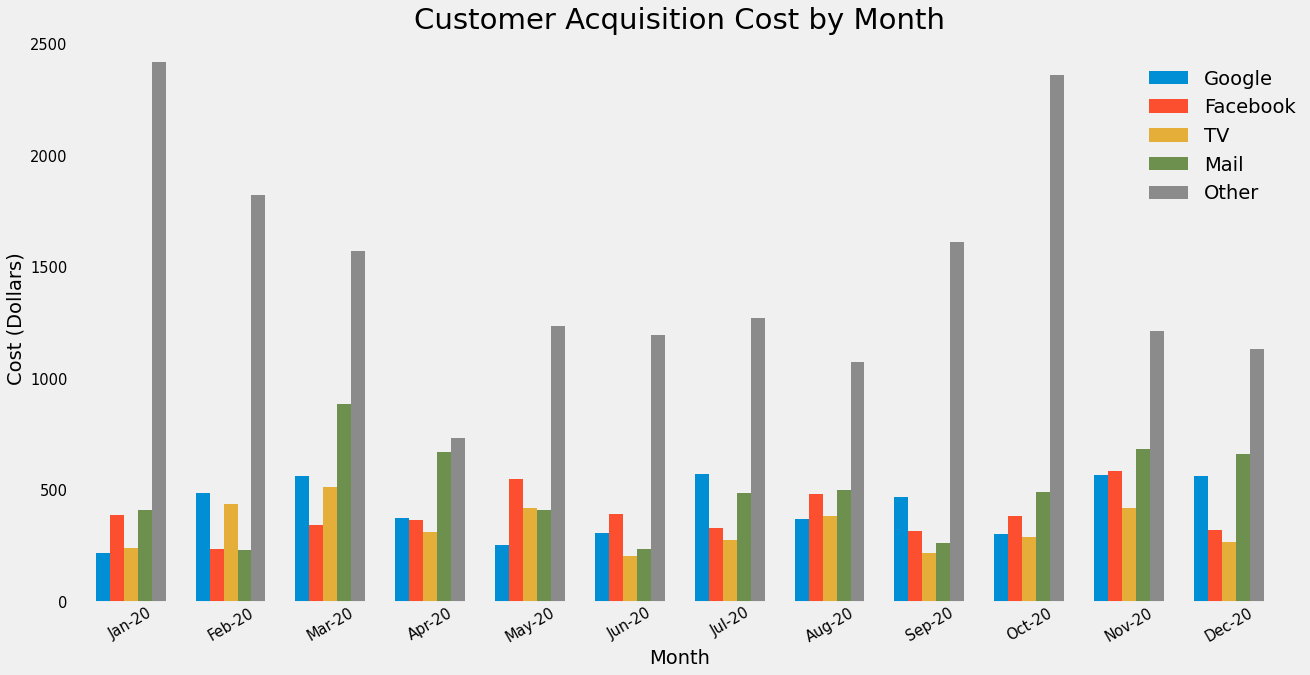

In [308]:
#Customer Acquisition Cost by Month and Channel
monthly_cac_dict = {}
for x, i in zip([google, facebook, tv, mail, other],
                ['Google', 'Facebook', 'TV', 'Mail', 'Other']):
    monthly_cac_dict.update({'{}'.format(i): x.CAC})
    
monthly_cac_df = pd.DataFrame(monthly_cac_dict)

fig, ax = plt.subplots(figsize=(20,10), dpi=70)

monthly_cac_df.plot(kind="bar", ax=ax, width=.7)
ax.set_title('Customer Acquisition Cost by Month', fontsize=30)
ax.set_ylabel('Cost (Dollars)', fontsize=20)
ax.set_yticklabels(range(0, 3000, 500), fontsize=15)
ax.set_xlabel('Month', fontsize=20)
ax.set_xticklabels(monthly_cac_df.index, rotation=30, fontsize=15)
ax.legend(loc='best', prop={'size': 20}, framealpha=0, bbox_to_anchor=(.46,.37,.56,.6))
ax.grid(False);

# 

# 

# 

# 

### The sales team has identified a new tool that will improve conversion (sales/opportunities) by 5% but will add $200k/month in costs. Should we invest in this tool?											

In [187]:
total_sales_ct

72506

In [309]:
#2020 budget
current_cost = prev_spend

#200k a month for 12 months
added_annual_tool_cost = (200000 * 12)

#sales/opportunities conversion 2020
current_opp_sale_conversion = (total_sales_ct / total_opportunities_ct)

#sales/opp conversion with 5% increase
new_opp_sale_conversion = (total_sales_ct / total_opportunities_ct + 0.05) 

#2020 annual sales count
current_total_sales_ct = total_sales_ct


#sales count with increased sales/opp conversion
new_tool_sales_ct = (new_opp_sale_conversion * total_opportunities_ct)

#2020 Customer Acquisition Cost
current_cac = (prev_spend / total_sales_ct)

#Customer Acquisition Cost with increased sales/opp conversion
new_cac = (prev_spend + added_annual_tool_cost)/ new_tool_sales_ct

#Number of sales the new tool will bring in
added_sales = (new_tool_sales_ct - total_sales_ct)

#Customer Acquisition Cost for just the additional sales 
added_sales_cac = (added_annual_tool_cost / added_sales)

In [212]:

new_tool_dict = {('current_annual_cost') : (prev_spend),
                 ('added_annual_tool_cost') : (200000 * 12),
                 ('new_cost') : (prev_spend + added_annual_tool_cost),
                 ('current_opp_sale_conversion') : (current_opp_sale_conversion),
                 ('new_opp_sale_conversion') : (total_sales_ct/total_opportunities_ct + 0.05) ,
                 ('current_sales_ct') : (total_sales_ct),
                 ('new_tool_sales_ct') : (new_opp_sale_conversion * total_opportunities_ct),
                 ('current_cac') : (prev_spend / total_sales_ct), 
                 ('new_cac') : (prev_spend + added_annual_tool_cost)/ new_tool_sales_ct,
                 ('added_sales') : (new_tool_sales_ct - total_sales_ct),
                 ('added_sales_cac') : (added_annual_tool_cost / added_sales)}
new_tool_dict

{'current_annual_cost': 25709028,
 'added_annual_tool_cost': 2400000,
 'new_cost': 28109028,
 'current_opp_sale_conversion': 0.3144423338797672,
 'new_opp_sale_conversion': 0.3644423338797672,
 'current_sales_ct': 72506,
 'new_tool_sales_ct': 84035.3,
 'current_cac': 354.5779383775136,
 'new_cac': 334.49071997125014,
 'added_sales': 11529.300000000003,
 'added_sales_cac': 208.16528323488845}

In [190]:
new_tool_comparison = pd.DataFrame.from_dict(new_tool_dict.items()).T
new_tool_comparison.columns = ['current_annual_cost', 'new_cost', 'current_opp_sale_conversion', 
                               'new_opp_sale_conversion','current_sales_ct', 'new_tool_sales_ct', 'current_cac', 'new_cac']
new_tool_comparison.drop(0, axis=0, inplace=True)

In [191]:
new_tool_comparison

,current_annual_cost,new_cost,current_opp_sale_conversion,new_opp_sale_conversion,current_sales_ct,new_tool_sales_ct,current_cac,new_cac
1,25709028.0000,28109028.0000,0.3144,0.3644,72506.0000,84035.3000,354.5779,334.4907


#### This tool would decrease the Customer Acquisition Cost by approximately `$`20.09 (5.66%)
    
#### The total annual cost with this tool would increase from 25.709 million to 28.109 million

#### Investing in this tool would bring in approximately 11,529 sales at `$`208.17 per sale, `$`146.41 less than the customer acquisition cost in 2020.

#### I would recommend for GoHealth to invest in this tool with the assumptions that there is a high probability of success and the financial/operational risk of bringing on this tool is low.